In [1]:
%matplotlib inline
import random
from matplotlib import pyplot as plt
from IPython import display
from mxnet import autograd,nd

/home/tomoya/.local/lib/python3.5/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)

In [3]:
features[0],labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

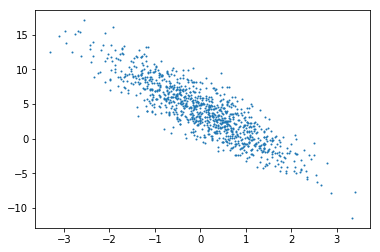

In [4]:
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)

In [5]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j),labels.take(j)

In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break



[[ 0.4241809   1.691645  ]
 [ 1.047153   -0.13258979]
 [-0.591276   -1.2689118 ]
 [-0.97745866 -0.01658815]
 [-1.2519326  -0.90704834]
 [ 0.96885103 -1.0218245 ]
 [-1.2867846  -0.8787071 ]
 [ 0.6547287   0.82645124]
 [ 1.5590299   0.7573965 ]
 [-0.17849484 -0.14060703]]
<NDArray 10x2 @cpu(0)> 
[-0.71003264  6.7498      7.325372    2.3091767   4.778022    9.628229
  4.618967    2.699491    4.7515903   4.3257504 ]
<NDArray 10 @cpu(0)>


In [7]:
w=nd.random.normal(scale=0.01,shape=(num_inputs,1))
b=nd.zeros(shape=(1,))

In [8]:
w.attach_grad()
b.attach_grad()

In [9]:
def linear_reg(X,w,b):
    return nd.dot(X,w)+b

In [10]:
def squared_loss(y_hat,y,batch_size):
    return nd.sum((y_hat-y.reshape(y_hat.shape))**2)/batch_size

In [11]:
def sgd(params,lr):
    for param in params:
        param[:]=param-lr*param.grad

In [12]:
lr=0.03
num_epochs=3
net=linear_reg
loss=squared_loss

for epoch in range(num_epochs):
    for X ,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l=loss(net(X,w,b),y,batch_size)
        l.backward()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        )
    train_l=loss(net(features,w,b),labels,len(features))
    print('epoch %d,loss %f'%(epoch,train_l.asnumpy()))


epoch 0,loss 0.000253
epoch 1,loss 0.000101
epoch 2,loss 0.000101


In [13]:
true_w,w

([2, -3.4], 
 [[ 2.000104 ]
  [-3.4003792]]
 <NDArray 2x1 @cpu(0)>)

In [14]:
true_b,b

(4.2, 
 [4.2003884]
 <NDArray 1 @cpu(0)>)